## Weather Data

The weather dataset contains information about weather characteristics such as temperature, cloud coverage, wind speed, dew temperature etc. The dataset provides this information for different sites throguhout various years.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import warnings
warnings.filterwarnings('ignore')

In [2]:
weather = pd.read_csv("../data/weather/weather.csv")

In [3]:
weather.head()

,timestamp,site_id,airTemperature,cloudCoverage,dewTemperature,precipDepth1HR,precipDepth6HR,seaLvlPressure,windDirection,windSpeed
0,2016-01-01 00:00:00,Panther,19.4,NaN,19.4,0.0,NaN,NaN,0.0,0.0
1,2016-01-01 01:00:00,Panther,21.1,6.0,21.1,-1.0,NaN,1019.4,0.0,0.0
2,2016-01-01 02:00:00,Panther,21.1,NaN,21.1,0.0,NaN,1018.8,210.0,1.5
3,2016-01-01 03:00:00,Panther,20.6,NaN,20.0,0.0,NaN,1018.1,0.0,0.0
4,2016-01-01 04:00:00,Panther,21.1,NaN,20.6,0.0,NaN,1019.0,290.0,1.5


In [4]:
# Inspecting columns in weather data
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331166 entries, 0 to 331165
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   timestamp       331166 non-null  object 
 1   site_id         331166 non-null  object 
 2   airTemperature  331038 non-null  float64
 3   cloudCoverage   160179 non-null  float64
 4   dewTemperature  330838 non-null  float64
 5   precipDepth1HR  197980 non-null  float64
 6   precipDepth6HR  18162 non-null   float64
 7   seaLvlPressure  309542 non-null  float64
 8   windDirection   318161 non-null  float64
 9   windSpeed       330592 non-null  float64
dtypes: float64(8), object(2)
memory usage: 25.3+ MB


## Exploratory Data Analysis (EDA)

In [5]:
weather.shape

(331166, 10)

In [6]:
weather.dtypes

timestamp          object
site_id            object
airTemperature    float64
cloudCoverage     float64
dewTemperature    float64
precipDepth1HR    float64
precipDepth6HR    float64
seaLvlPressure    float64
windDirection     float64
windSpeed         float64
dtype: object

## Missing Values

In [7]:
# Percentage of missing values in each feature
na_features = [features for features in weather.columns if weather[features].isnull().sum() > 0]
for features in na_features:
    # Updated to round the missing values percentage to two decimal places
    print(f"{features} : {round(weather[features].isnull().mean() * 100, 2)}%")

airTemperature : 0.04%
cloudCoverage : 51.63%
dewTemperature : 0.1%
precipDepth1HR : 40.22%
precipDepth6HR : 94.52%
seaLvlPressure : 6.53%
windDirection : 3.93%
windSpeed : 0.17%


## Feature Exploration

In [8]:
# Function to divide the different feature data types 
def categorize_variables(df):
    
    categorical = []
    discrete = []
    continuous = []
    datetime = []
    
    for column in df.columns:
        
        if pd.api.types.is_datetime64_any_dtype(df[column]):
            datetime.append(column)
            
        if pd.api.types.is_numeric_dtype(df[column]):
            
            if len(df[column].unique()) / len(df) < 0.05:
                discrete.append(column)
                
            else:
                continuous.append(column)
                
        elif pd.api.types.is_object_dtype(df[column]):
            categorical.append(column)
            
        else:
            categorical.append(column)
    
    return categorical, discrete, continuous, datetime

In [9]:
# Applying the above function to segregate the features 
categorical,discrete,continuous,datetime = categorize_variables(weather)
numeric = discrete + continuous

print("Categorical: ", categorical)
print("Discrete: ", discrete)
print("Continuous: ", continuous)
print("Numeric: ", numeric)

Categorical:  ['timestamp', 'site_id']
Discrete:  ['airTemperature', 'cloudCoverage', 'dewTemperature', 'precipDepth1HR', 'precipDepth6HR', 'seaLvlPressure', 'windDirection', 'windSpeed']
Continuous:  []
Numeric:  ['airTemperature', 'cloudCoverage', 'dewTemperature', 'precipDepth1HR', 'precipDepth6HR', 'seaLvlPressure', 'windDirection', 'windSpeed']


## Numerical Variables

### Univariate Analysis

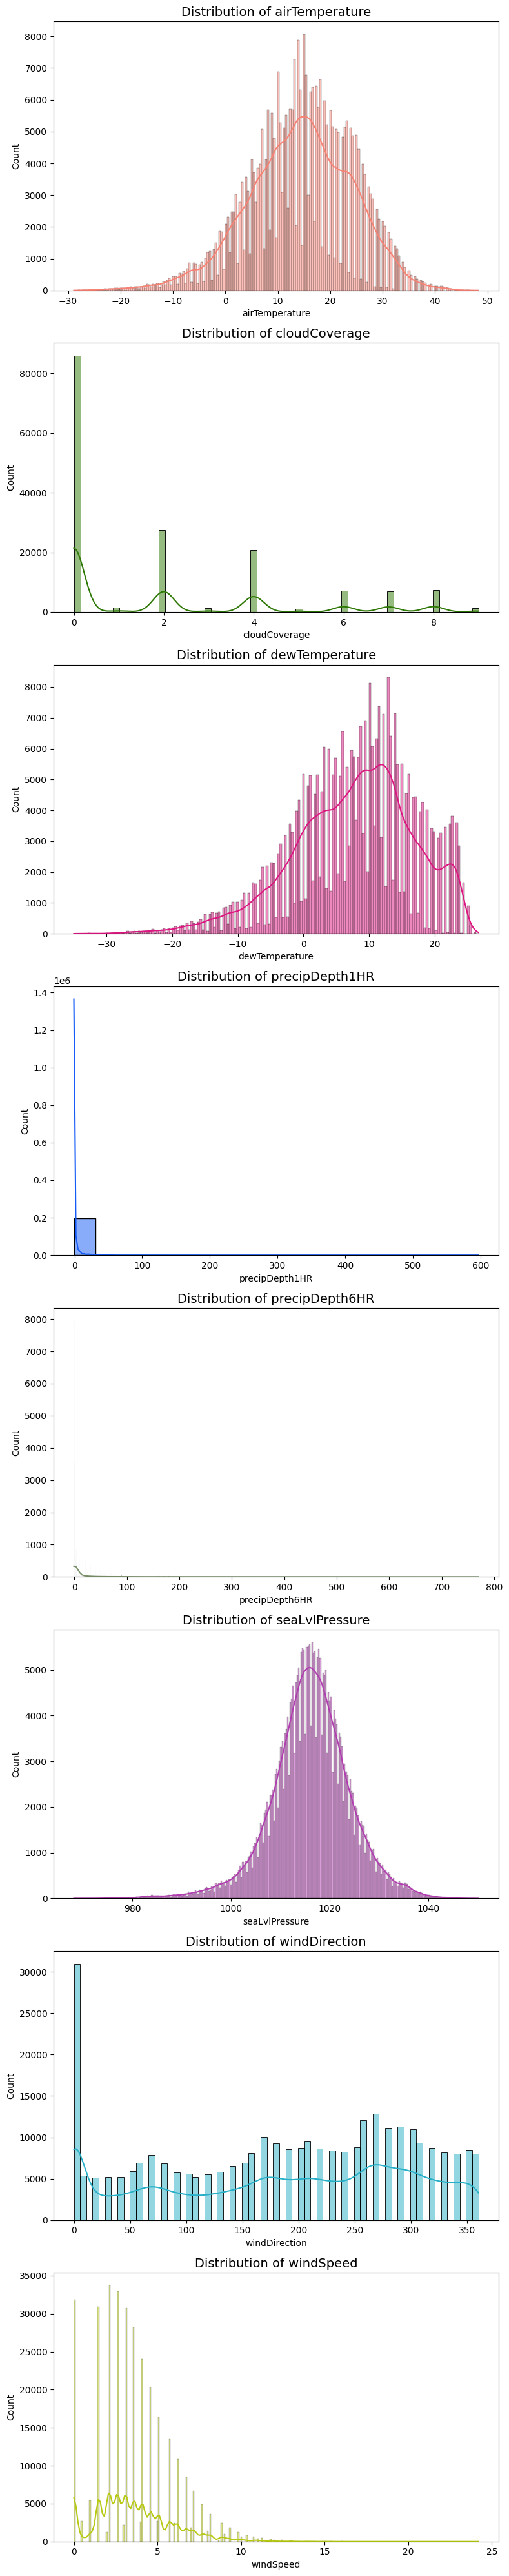

In [10]:
numerical_cols = weather.select_dtypes(include=np.number).columns.tolist()
fig, axes = plt.subplots(len(numerical_cols), 1, figsize=(8, 5 * len(numerical_cols)))
for i, col in enumerate(numerical_cols):
    sns.histplot(weather[col], kde=True, ax=axes[i], color=np.random.rand(3,))
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
plt.tight_layout()

- The air temperature is uniformly distributed in the distribution of air temperature plot.
- The cloud coverage with the most occcurences seems to be 0 cloud coverage followed by 2.
- The dew temperature seems to be skewed left with dew temperature 10 having the most occurrences.
- The sea level pressure graph also seems to be unifromly distributed with the most common sea level pressure being 1018 hPa.
- The wind speed graph shows right skewness with the majortiy of recorded wind speed being between 0-5 m/s. 

### Bivariate Analysis

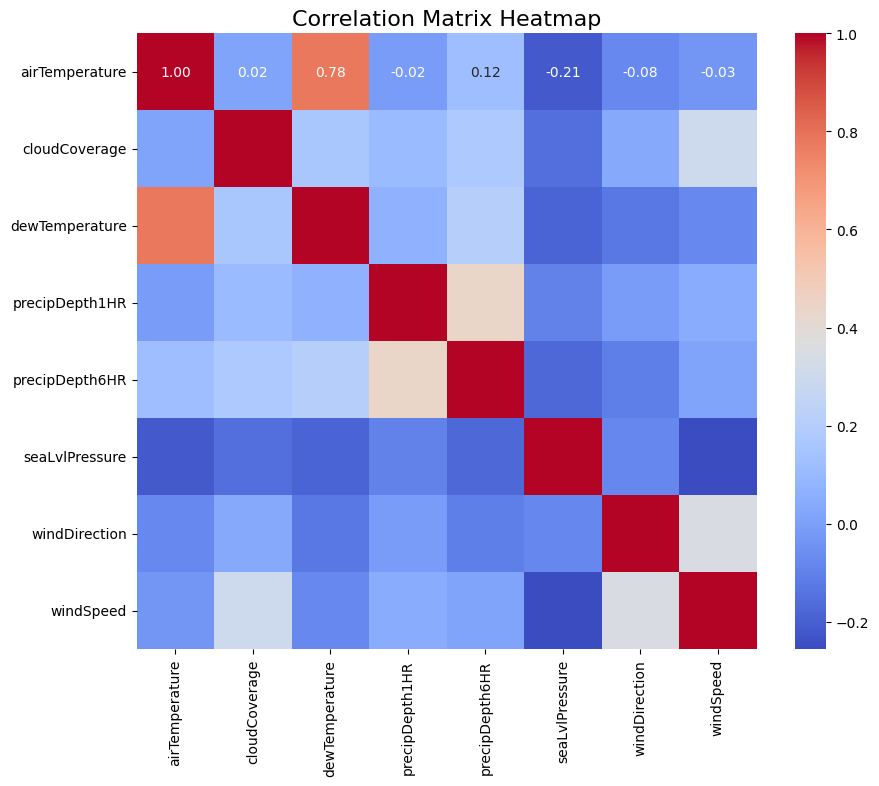

In [11]:
# Correlation matrix heatmap
corr_matrix = weather[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap', fontsize=16)

plt.show()

- From the corelation plot we can see that airTemperature and dewTemperature have the strongest correlation.
- Another low to moderate negative correlation seems to be present between airTemperature and Sea level Pressure. 

## Categorical Variables

### Univariate Analysis

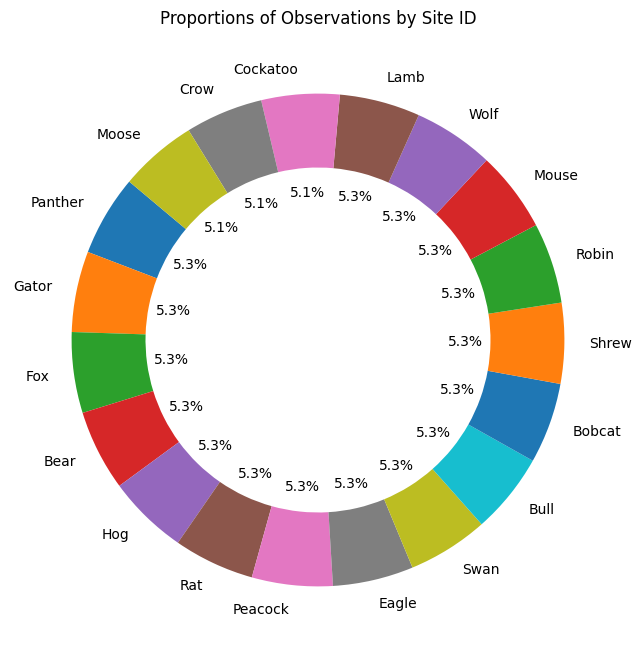

In [12]:
# Calculate proportions
site_id_proportions = weather['site_id'].value_counts(normalize=True)

# Plot a donut chart
plt.figure(figsize=(8, 8))
plt.pie(site_id_proportions, labels=site_id_proportions.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
plt.title('Proportions of Observations by Site ID')
plt.show()

- The observations per site seem to be uniformly distributed among all the sites.
- Cockatoo, Moose, and Crow appear to have lesser observations than the others, but the percentages are close enoguh to compare data among the sites.

### Bivariate Analysis

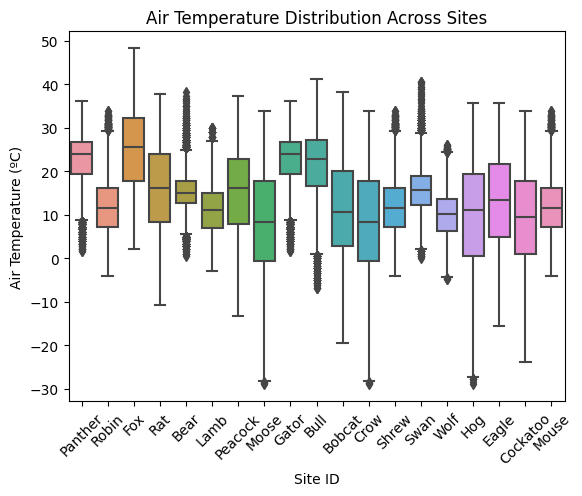

In [13]:
# Boxplot of airTemperature distribution across different sites
sns.boxplot(x='site_id', y='airTemperature', data=weather)
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.title('Air Temperature Distribution Across Sites')
plt.xlabel('Site ID')
plt.ylabel('Air Temperature (ºC)')
plt.show()

- The average air temperature for the sites ranges from 8 degree Celsius to 25 degree Celsius. 
- Moose and Crow have the lowest air temperature and Fox has the highest. 
- Moose and Hog also seem to have the greatest distribution in air temperatures as compared to the other sites.

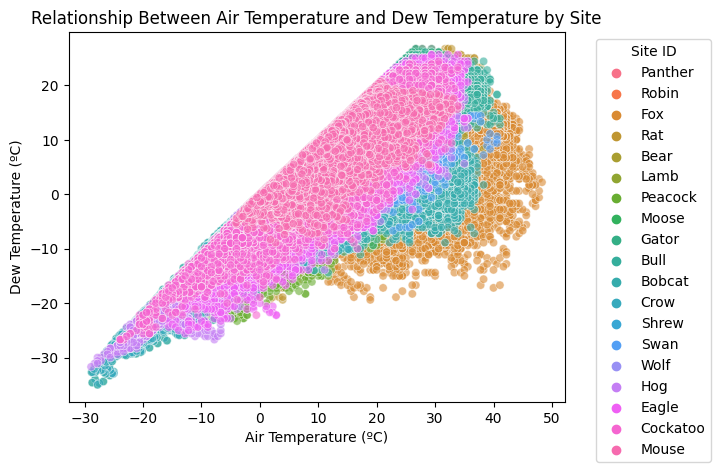

In [14]:
sns.scatterplot(x='airTemperature', y='dewTemperature', data=weather, hue='site_id', alpha=0.6)
plt.title('Relationship Between Air Temperature and Dew Temperature by Site')
plt.xlabel('Air Temperature (ºC)')
plt.ylabel('Dew Temperature (ºC)')
plt.legend(title='Site ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

* Positive Correlation: There is a clear positive correlation between air temperature and dew temperature. As air temperature increases, dew temperature also increases. This is expected, as warmer air can hold more moisture, leading to a higher dew point.

* Data Density: The densest areas of the plot are where most data points are concentrated, which seems to be around the middle temperatures for both air and dew points. This suggests that these conditions are the most common for the sites represented.

* Temperature Range: The plot shows a wide range of temperatures for both air and dew points, from below -30°C to above 40°C. This indicates that the dataset includes observations from a variety of climates or seasons.

* Outliers: There are some observations where the dew temperature is significantly lower than the air temperature, particularly in the lower temperature ranges. This could be due to extremely dry conditions.

* Site Variability: The spread of colors throughout the plot suggests that there's variability in temperature readings between different sites. Some sites, for instance, only have data in the warmer temperature ranges, while others span a broad range of temperatures.

* Climatic Differences: The variation among the sites (colors) could reflect different climatic zones. For example, sites that correspond to warmer colors (indicating higher temperatures) might be located in warmer climates, while those with cooler colors (indicating lower temperatures) might be in cooler climates.



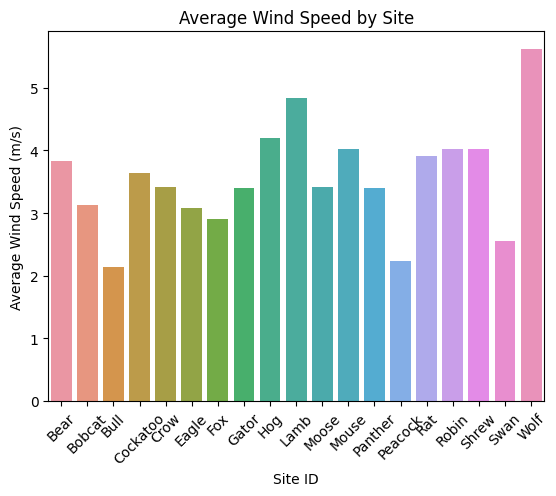

In [15]:
# Calculate the mean windSpeed for each site
avg_wind_speed_by_site = weather.groupby('site_id')['windSpeed'].mean().reset_index()

# Bar plot of average wind speed by site
sns.barplot(x='site_id', y='windSpeed', data=avg_wind_speed_by_site)
plt.xticks(rotation=45)
plt.title('Average Wind Speed by Site')
plt.xlabel('Site ID')
plt.ylabel('Average Wind Speed (m/s)')
plt.show()

- The site with the highest average windspeed is Wolf by far.
- The rest of the sites have a uniform distribution except bull, peacock, and swan all have lower average wind speeds.

## Temporal Analysis

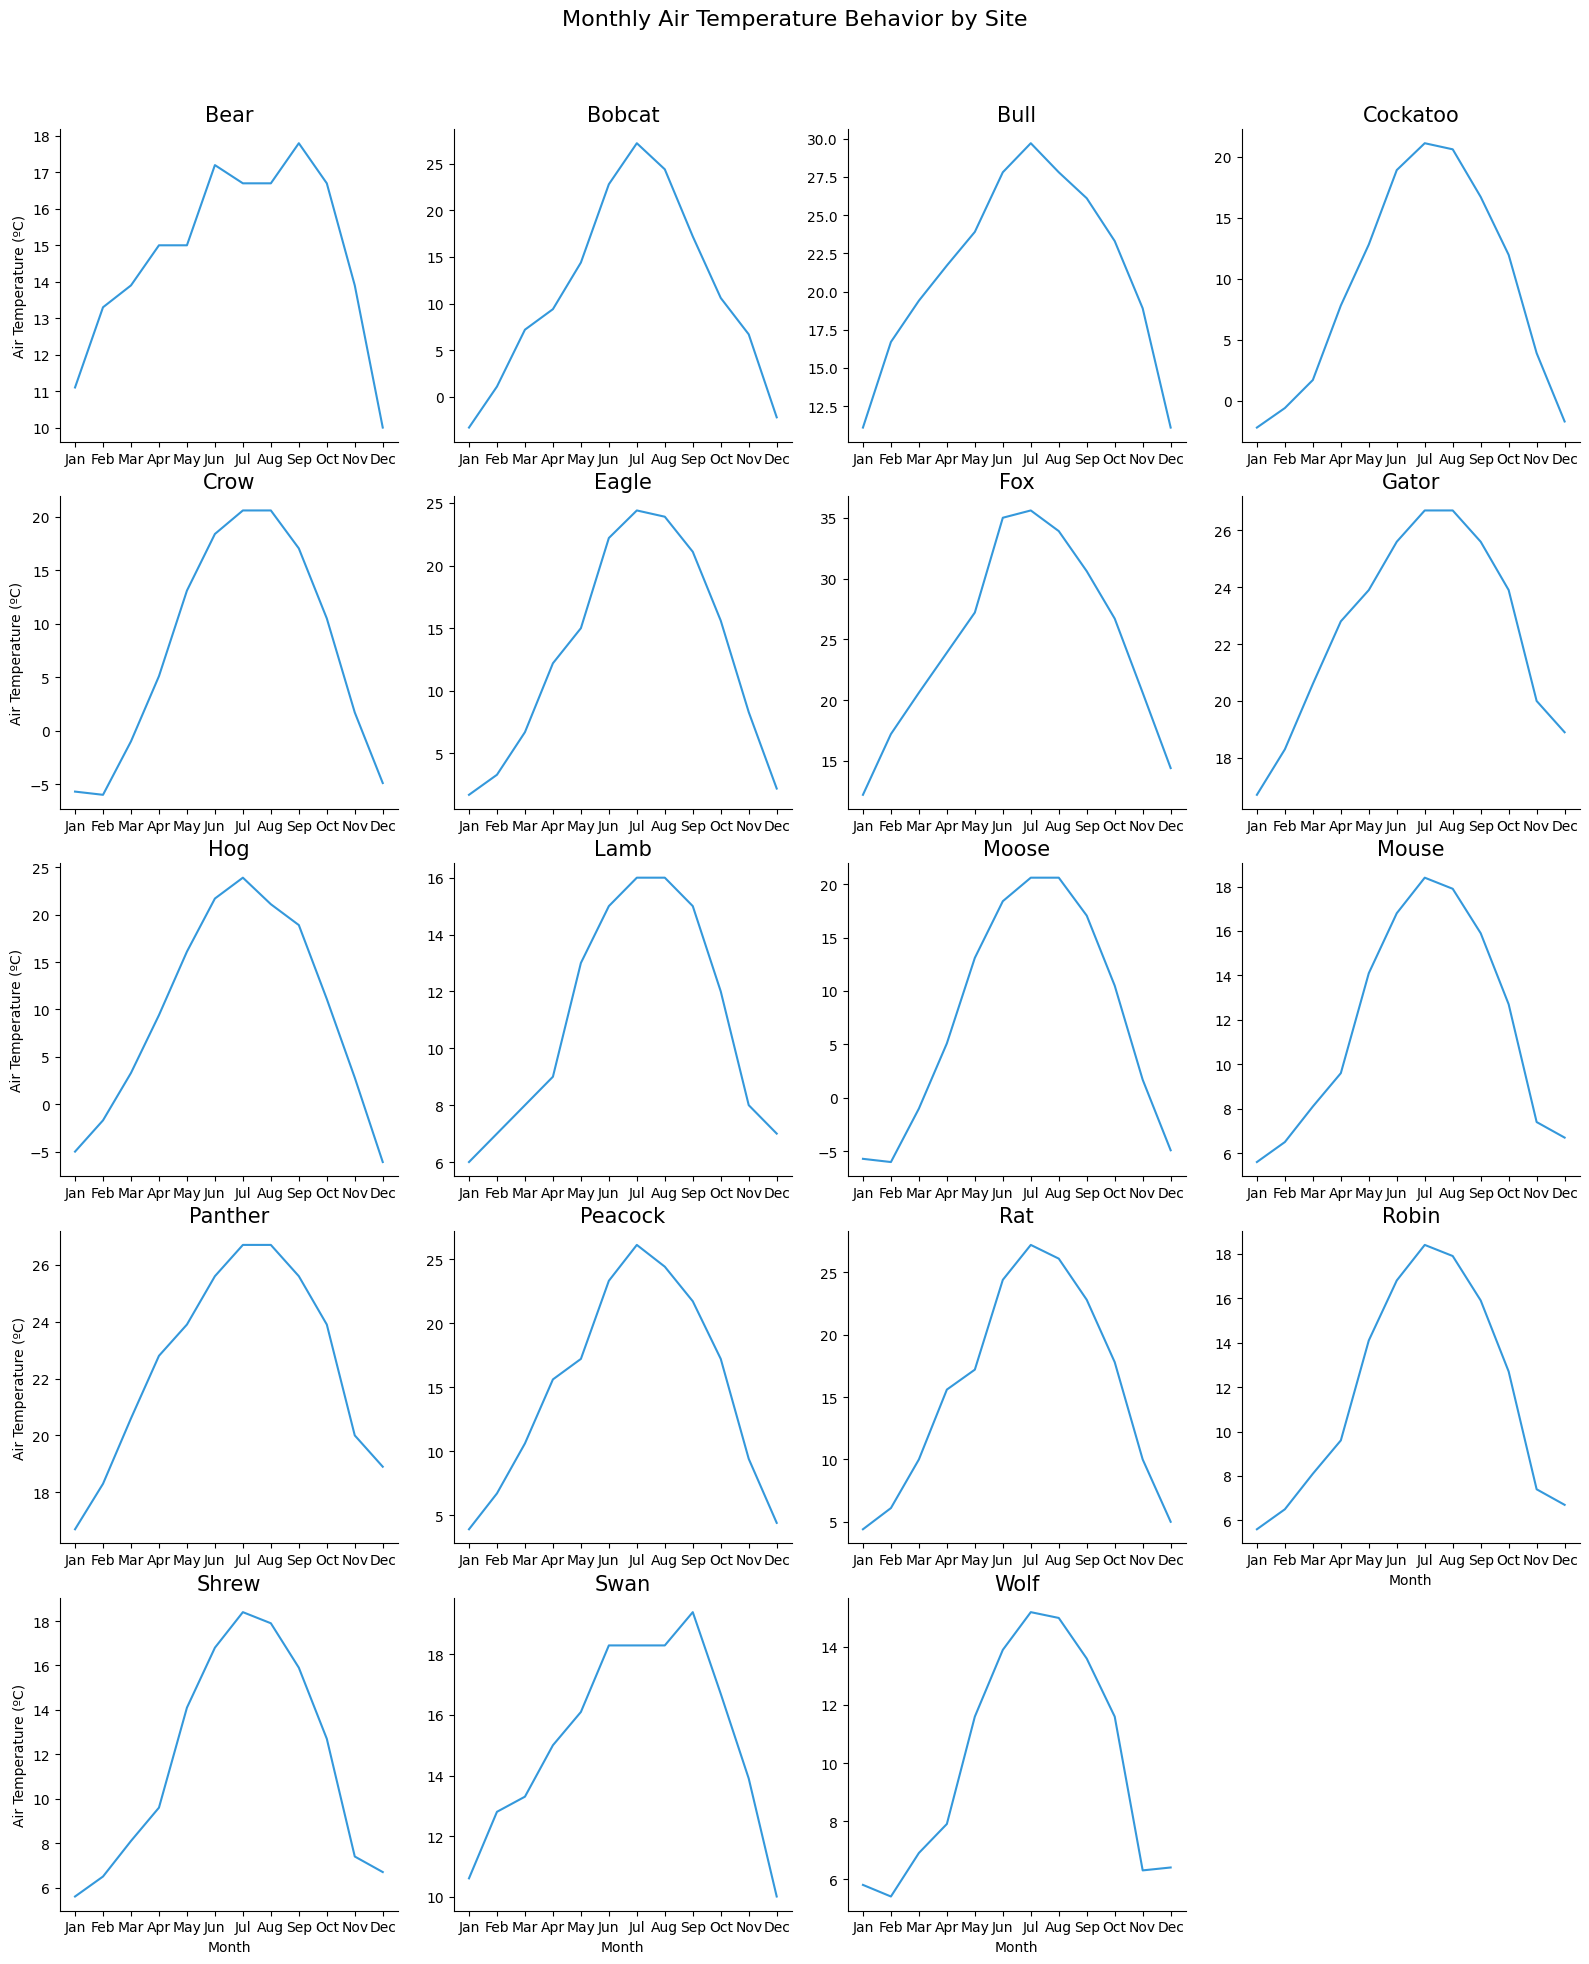

In [16]:
weather['timestamp'] = pd.to_datetime(weather['timestamp'])

# Extract month from the 'timestamp' for grouping
weather['month'] = weather['timestamp'].dt.month

# Creates a temporal dataframe grouped by site and month, calculating the median airTemperature
temp = weather.groupby(["site_id", "month"]).median().reset_index()

# Assuming 'colors' is a list of color codes, let's define one for the example
colors = ['#3498db']  # A shade of blue

# Create a FacetGrid to plot air temperature trends across sites
g = sns.FacetGrid(temp, col="site_id", col_wrap=4, sharex=False, sharey=False, height=4)
g.map(plt.plot, "month", "airTemperature", color=colors[0])

# Setting titles for each subplot
g.set_titles("{col_name}", size=15)

# Setting axis labels for all plots
g.set_axis_labels("Month", "Air Temperature (ºC)")

# Customizing x-ticks to show all months
g.set(xticks=range(1, 13), xticklabels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Adding a main title to the figure
plt.subplots_adjust(top=0.92)
plt.suptitle('Monthly Air Temperature Behavior by Site', fontsize=16)

# Display the plots
plt.show()

- The sites all follow similar distributons of air temperature. 
- The sites tend to reach peak air temperature in the months of June through July and their lowest temperatures in the January and December.

## Compare 2016 and 2017 weather data

In [17]:
weather2016 = weather[weather["timestamp"] < "2017-01-01 00:00:00"]

In [18]:
weather2017 = weather[weather["timestamp"] >= "2017-01-01 00:00:00"]

Text(0.5, 0.98, '2017 weather data vs 2016 weather data')

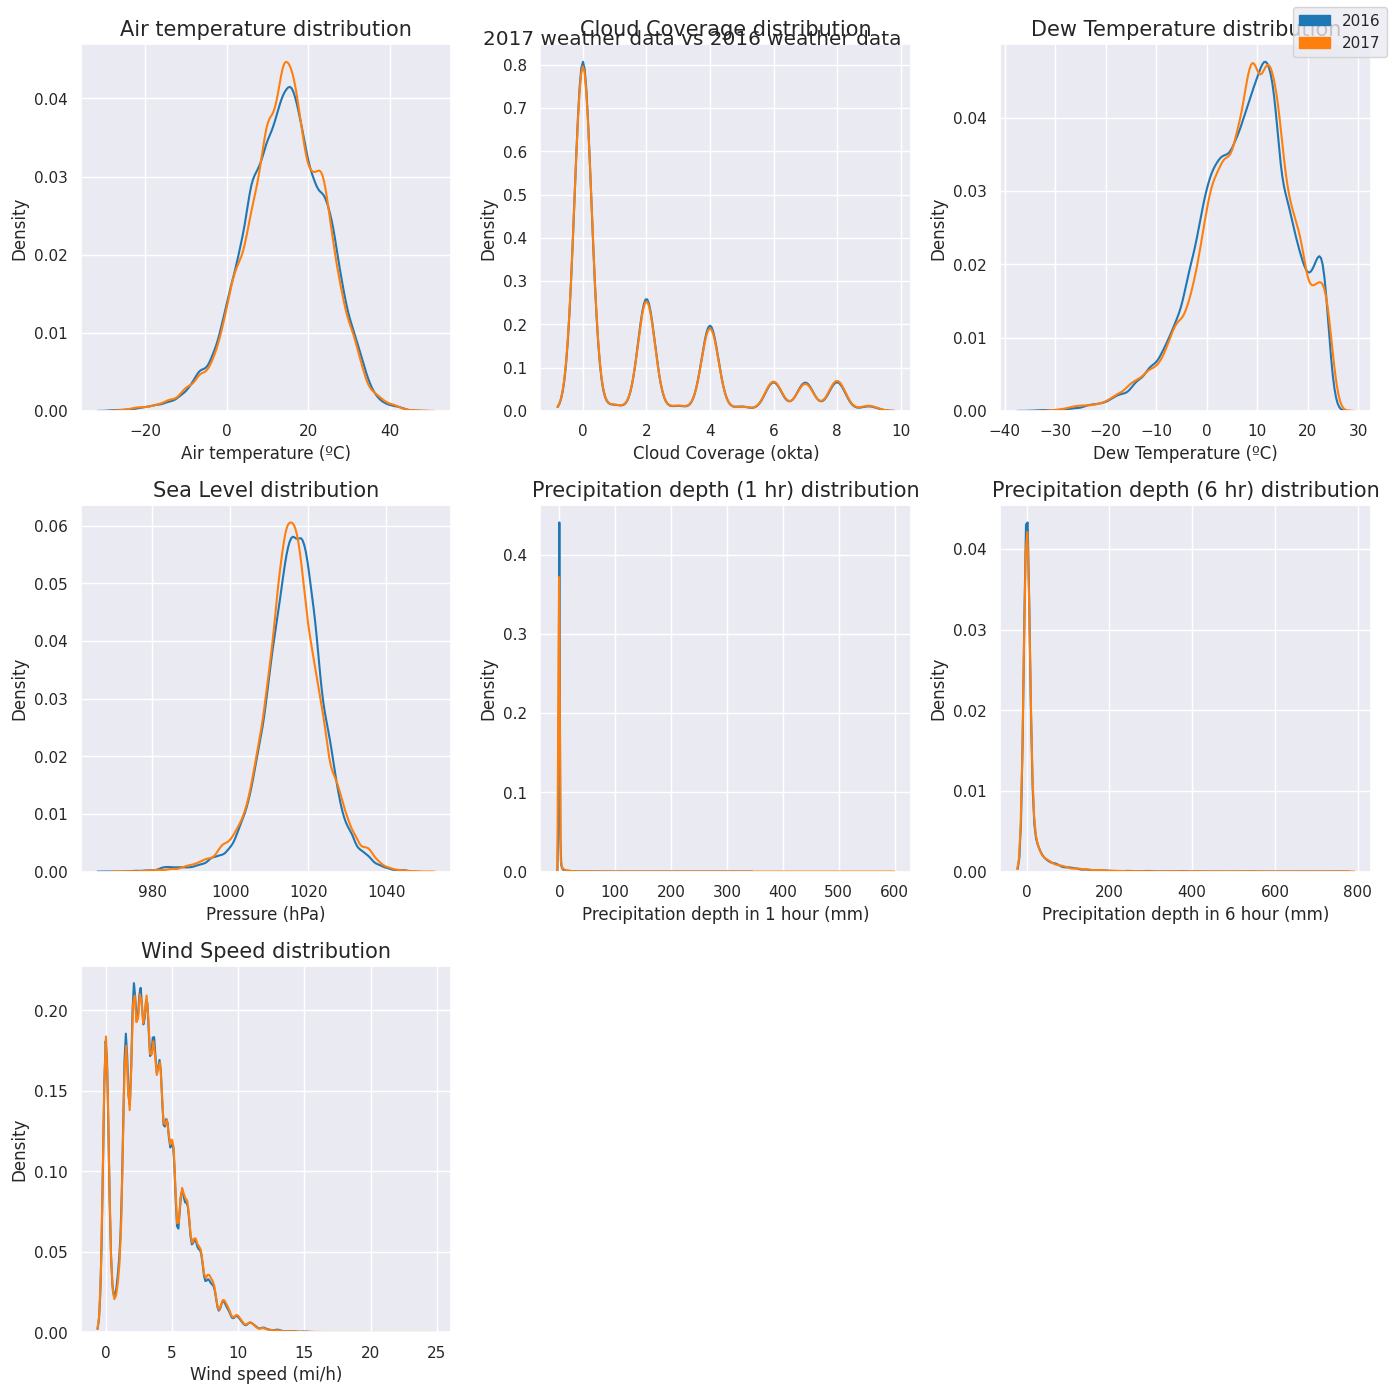

In [19]:
colors = ['#1f77b4', '#ff7f0e'] 

sns.set(rc={'figure.figsize':(14,14)})
f, axes = plt.subplots(3, 3)
axes = axes.flatten()

# airTemperature KDE plot
ax0 = axes[0]
g0 = sns.kdeplot(data=weather2016["airTemperature"].dropna(), ax=ax0, color=colors[0])
g0b = sns.kdeplot(data=weather2017["airTemperature"].dropna(), ax=ax0, color=colors[1])
ax0.title.set_text('Air temperature distribution')
ax0.set(xlabel="Air temperature (ºC)")

# cloudCoverage KDE plot
ax1 = axes[1]
g1 = sns.kdeplot(data=weather2016["cloudCoverage"].dropna(), ax=ax1, color=colors[0])
g1b = sns.kdeplot(data=weather2017["cloudCoverage"].dropna(), ax=ax1, color=colors[1])
ax1.title.set_text('Cloud Coverage distribution')
ax1.set(xlabel="Cloud Coverage (okta)")

# dewTemperature KDE plot
ax2 = axes[2]
g2 = sns.kdeplot(data=weather2016["dewTemperature"].dropna(), ax=ax2, color=colors[0])
g2b = sns.kdeplot(data=weather2017["dewTemperature"].dropna(), ax=ax2, color=colors[1])
ax2.title.set_text('Dew Temperature distribution')
ax2.set(xlabel="Dew Temperature (ºC)")

# seaLvlPressure KDE plot
ax3 = axes[3]
g3 = sns.kdeplot(data=weather2016["seaLvlPressure"].dropna(), ax=ax3, color=colors[0])
g3b = sns.kdeplot(data=weather2017["seaLvlPressure"].dropna(), ax=ax3, color=colors[1])
ax3.title.set_text('Sea Level distribution')
ax3.set(xlabel="Pressure (hPa)")

# precipDepth1HR KDE plot
ax4 = axes[4]
g4 = sns.kdeplot(data=weather2016["precipDepth1HR"].dropna(), ax=ax4, color=colors[0])
g4b = sns.kdeplot(data=weather2017["precipDepth1HR"].dropna(), ax=ax4, color=colors[1])
ax4.title.set_text('Precipitation depth (1 hr) distribution')
ax4.set(xlabel="Precipitation depth in 1 hour (mm)")

# precipDepth6HR KDE plot
ax5 = axes[5]
g5 = sns.kdeplot(data=weather2016["precipDepth6HR"].dropna(), ax=ax5, color=colors[0])
g5b = sns.kdeplot(data=weather2017["precipDepth6HR"].dropna(), ax=ax5, color=colors[1])
ax5.title.set_text('Precipitation depth (6 hr) distribution')
ax5.set(xlabel="Precipitation depth in 6 hour (mm)")

# windSpeed KDE plot
ax6 = axes[6]
g6 = sns.kdeplot(data=weather2016["windSpeed"].dropna(), ax=ax6, color=colors[0])
g6b = sns.kdeplot(data=weather2017["windSpeed"].dropna(), ax=ax6, color=colors[1])
ax6.title.set_text('Wind Speed distribution')
ax6.set(xlabel="Wind speed (mi/h)")

# Sets fontsize and adjusts layout
for ax in axes:
    ax.title.set_size(15)
f.delaxes(axes[7])
f.delaxes(axes[8])
f.tight_layout()

# Customizes legend and title
green_patch = mpatches.Patch(color=colors[0], label='2016')
blue_patch = mpatches.Patch(color=colors[1], label='2017')
f.legend(handles=[green_patch, blue_patch], loc='upper right')

f.suptitle("2017 weather data vs 2016 weather data", x=0.5, y=0.98)

- From the plots we can see that there is not much variation between the distributions in 2016 vs 2017. 
- The 2017 air temperature has seemed to increase slightly as well as the sea level pressure. 

## Delete Unused variables

In [20]:
import gc
del weather, weather2016, weather2017
gc.collect()

7708